In [ ]:
import numpy as np 
import cv2
from skimage.util.shape import view_as_blocks
from sklearn.preprocessing import StandardScaler

patches=[]
patch_size=8
img = np.random.rand(256,256)
scaler = StandardScaler().fit(img)
img = scaler.transform(img)# 归一化
for block in np.reshape(view_as_blocks(img, block_shape=(patch_size, patch_size)), (-1, patch_size, patch_size)): # 将图片分割为8x8的窗口
    # np.reshape(cv2.pyrDown(cv2.pyrDown(block)), (-1,))
    patches.append(np.reshape(block[::2,::2], (-1,))) # 2次下采样，当作每隔4个采样  shape: (4,)

patches[0]

array([ 1.47470712, -0.10640484,  0.96949823,  1.20813227,  1.09097201,
       -0.35419341,  1.25946861,  1.2886719 ,  1.22492137,  0.47964654,
       -1.196787  ,  1.15942674,  0.52097022, -1.12316012, -0.00530417,
       -0.02305665])

In [ ]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)

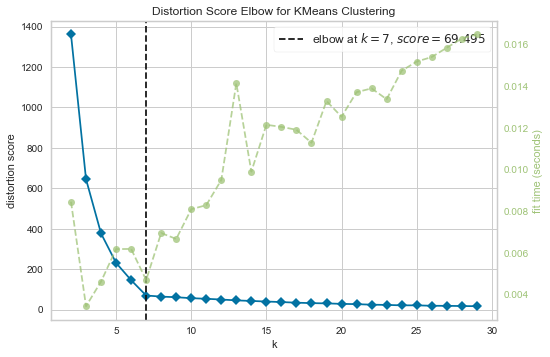

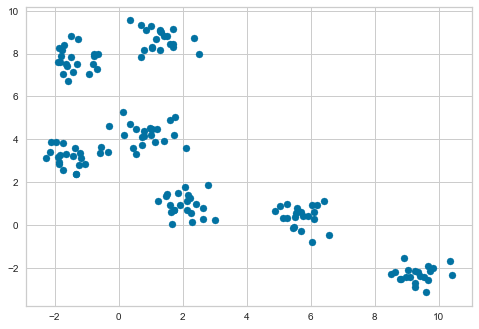

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
X,y=make_blobs(n_samples=150,
                        n_features=2,
                        centers=7,
                        cluster_std=0.5,
                        shuffle=True,
                        random_state=0)
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()  
plt.scatter(X[:,0],X[:,1])

In [56]:
import numpy as np 
import cv2
from skimage.util.shape import view_as_blocks
from sklearn.preprocessing import StandardScaler

img_size=256
patches=[]
patch_size=8
img = np.random.rand(256,256)

def sliding(image, step_size, windows_size):
    patches = []
    for y in range(0,image.shape[0],step_size):
        for x in range(0,image.shape[1],step_size):
            patches.append(image[y:y+windows_size,x:x+windows_size])
    return patches

def sliding_window(image, stepSize, windowSize):
	# slide a window across the image
	for y in range(0, image.shape[0]-windowSize[0], stepSize):
		for x in range(0, image.shape[1]-windowSize[1], stepSize):
			# yield the current window
			yield (image[y:y + windowSize[1], x:x + windowSize[0]])

# if img.shape != (img_size,img_size):
#     img = cv2.resize(img,(img_size,img_size))

# for block in np.reshape(view_as_blocks(img, block_shape=(patch_size, patch_size)), (-1, patch_size, patch_size)): # 将图片分割为8x8的窗口
#     # print(block)
#     patches.append(np.reshape(block[::4,::4], (-1,))) # 每隔4个采样，拉直
for patch in sliding_window(img, 1, (8,8)):
    patches.append(np.reshape(patch[::4,::4], (-1,))) # 每隔4个采样，拉直

print(np.array(patches)[0].shape)


(4,)


## 图片路径 标签获取

In [1]:

import os 
from tqdm import tqdm 

trainingDatasetPath = '../data/training'
testDatasetPath = '../data/testing'

labels = {
    'Forest':0, 
    'bedroom':1, 
    'Office':2, 
    'Highway':3, 
    'Coast':4, 
    'Insidecity':5, 
    'TallBuilding':6,
    'industrial':7,
    'Street':8, 
    'livingroom':9,
    'Suburb':10, 
    'Mountain':11, 
    'kitchen':12, 
    'OpenCountry':13, 
    'store':14
    }
trainging = []
for dirName in tqdm(os.listdir(trainingDatasetPath), desc='reading images...'):
    if(dirName.startswith('.')): continue # Ignore the .DS_Stroe
    dirFullPath = os.path.join(trainingDatasetPath, dirName)
    img_counter = 0
    for imgPath in os.listdir(dirFullPath):
        if(imgPath.startswith('.')): continue # Ignore the .DS_Stroe
        imgFullPath = os.path.join(dirFullPath, imgPath)
        trainging.append(imgFullPath + ' ' + str(labels[dirName]))
    
f=open("training.txt","w")
f.writelines('\n'.join(trainging))
f.close()

testing= []
for imgName in tqdm(os.listdir(testDatasetPath), desc='reading images...'):
    if(imgName.startswith('.')): continue # Ignore the .DS_Stroe
    dirFullPath = os.path.join(testDatasetPath, imgName)
    if(imgName.startswith('.')): continue # Ignore the .DS_Stroe
    # imgFullPath = os.path.join(dirFullPath, imgName)
    testing.append(dirFullPath)

f=open("testings.txt","w")
f.writelines('\n'.join(testing))
f.close()

reading images...: 100%|██████████| 2985/2985 [00:00<00:00, 1036080.56it/s]


初始化的学习率： 0.001


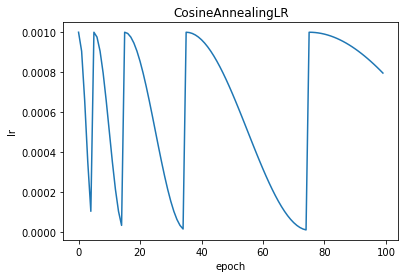

In [8]:
import torch.optim as optim
from torch.optim import lr_scheduler

import torch
import torch.nn as nn
import itertools
import matplotlib.pyplot as plt

initial_lr = 1e-3
epochs = 100
# 定义一个简单的模型
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)

    def forward(self, x):
        pass
if __name__ == '__main__':
    net = model()
    optimizer = torch.optim.Adam(net.parameters(), lr=initial_lr)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer,T_0=5, T_mult=2, eta_min=1e-5)
    print("初始化的学习率：", optimizer.defaults['lr'])
    lr_list = []  # 保存学习率
    for epoch in range(epochs):
        # train
        optimizer.zero_grad()
        optimizer.step()
        # print("第%d个epoch的学习率：%f" % (epoch, optimizer.param_groups[0]['lr']))
        lr_list.append(optimizer.param_groups[0]['lr'])
        scheduler.step()
    # 画出lr的变化
    plt.plot(list(range(epochs)), lr_list)
    plt.xlabel("epoch")
    plt.ylabel("lr")
    plt.title("CosineAnnealingLR")
    plt.show()


In [6]:
import os

import cv2
import numpy as np
import sklearn
from scipy.cluster import vq
from skimage.util.shape import view_as_blocks
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.utils.random import sample_without_replacement
from tqdm import tqdm, trange
from yellowbrick.cluster import KElbowVisualizer

img = np.random.rand(256,256)
patch_size = 8
for block in np.reshape(view_as_blocks(img, block_shape=(patch_size, patch_size)), (-1, patch_size, patch_size)): # 将图片分割为8x8的窗口
    print(block)
    patches.append(np.reshape(block[::4,::4], (-1,))) # 每隔4个采样，拉直 （无重叠）

[[0.56261406 0.58129877 0.10668229 0.10272719 0.25786939 0.68072298
  0.36782608 0.18053894]
 [0.54443726 0.91935264 0.39752073 0.60309099 0.25094981 0.15440196
  0.60396184 0.39327286]
 [0.03580601 0.97222516 0.66680962 0.88768843 0.57945696 0.46205258
  0.22493358 0.59764709]
 [0.82573483 0.47631665 0.20262531 0.30382214 0.86256302 0.25773697
  0.06402225 0.05241632]
 [0.50031148 0.69638634 0.11785966 0.70749534 0.19727353 0.62486514
  0.04652882 0.89818607]
 [0.64793358 0.98706206 0.70372881 0.70788819 0.37080129 0.7935512
  0.0793173  0.66407485]
 [0.96208503 0.89691371 0.98384008 0.48249241 0.93933489 0.34257459
  0.4085122  0.66900334]
 [0.1356442  0.16989076 0.52244056 0.42402969 0.17023297 0.92662248
  0.16536371 0.45088312]]


NameError: name 'patches' is not defined

In [6]:
import numpy as np 
img = np.random.rand(128,256)
length = min(img.shape[0], img.shape[1])

x = img.shape[1] // 2 - length//2
y = img.shape[0] // 2 - length//2

img = img[y:y+length, x:x+length]
img.shape

(128, 128)